In [1]:
install.packages("UsingR")
library(UsingR)
install.packages("sampling")
library(sampling)
install.packages("stringr")
library(stringr)  # for STRING operations
install.packages("tidyverse")
library(tidyverse)  # to work with TIBBLE
install.packages("stats")
library(stats)
install.packages("prob")
library(prob)
install.packages("dtplyr")
library(dtplyr)
install.packages("dbplyr")
library(dbplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘htmlwidgets’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘HistData’, ‘Hmisc’


Loading required package: MASS

Loading required package: HistData

Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units



Attaching package: ‘UsingR’


The following object is masked from ‘package:survival’:

    cancer


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘lpSolve’



Attaching package: ‘sampling’


The following objects are masked from ‘package:survival’:

    cluster, strata


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘l

In [3]:
## Enter the path of the data file
original.data <- read.csv("/content/Sales_train.csv")

In [4]:
# convert data into numeric to perform calculations 
original.data$Stay_In_Current_City_Years = as.numeric(ifelse(original.data$Stay_In_Current_City_Years=='4+', 6, original.data$Stay_In_Current_City_Years))
attach(original.data)

In [5]:
head(original.data)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1000001,P00069042,F,0-17,10,A,2,0,3,NA,NA,8370
2,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
3,1000001,P00087842,F,0-17,10,A,2,0,12,NA,NA,1422
4,1000001,P00085442,F,0-17,10,A,2,0,12,14,NA,1057
5,1000002,P00285442,M,55+,16,C,6,0,8,NA,NA,7969
6,1000003,P00193542,M,26-35,15,A,3,0,1,2,NA,15227


In [6]:
# DATA GATHERING and CLEANING
user.id = User_ID
product.id = Product_ID
gender = Gender
age.range = Age
occupation = Occupation
city = City_Category
marital.status = Marital_Status
product.category.1 = Product_Category_1
years.in.current.city = Stay_In_Current_City_Years

In [7]:
# convert NA to 0 to perform calculations 
product.category.2 = Product_Category_2
product.category.2[which(is.na(product.category.2))] = 0

  # convert NA to 0 to perform calculations 
product.category.3 = Product_Category_3
product.category.3[which(is.na(product.category.3))] = 0

purchase = Purchase

 #making dataframe of data
blackfridaysales = data.frame(user.id, product.id, gender, occupation, city, years.in.current.city, marital.status, product.category.1, product.category.2, product.category.3, purchase)

In [9]:
# total samples 
purchase.samples.count = nrow(table(purchase))
cat("Total Samples: ", purchase.samples.count)

#For easy calculation rescaling purchases
print("For easy calculation rescaling purchases")
purchase = round(purchase/1000)


# calculating mean
purchase.mean = mean(purchase)
cat("Mean: ",purchase.mean)
  
  # calculating std. deviation
purchase.sd = sd(purchase)
cat("Standard Deviation: ",purchase.sd)


Total Samples:  18105[1] "For easy calculation rescaling purchases"
Mean:  9.275286Standard Deviation:  5.033707

[1] "Taking 0.5% of total sample"
Sample size=  91Orginal Data Mean | Sample Mean =  9.275286  |  8.263736Orginal Data Std. Dev. | Sample Std. Dev. =  5.033707  |  4.555425

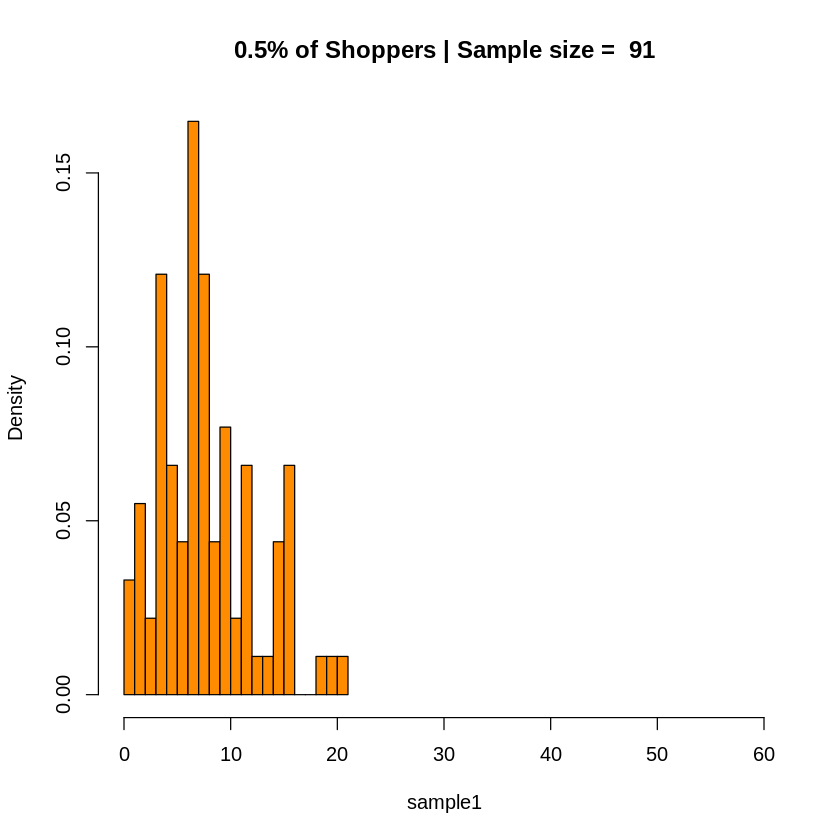

In [10]:
# SAMPLE 1
print("Taking 0.5% of total sample")
sample.size = round(purchase.samples.count*0.005)
cat("Sample size= ", sample.size)

sample1 = sample(purchase, size = sample.size, replace = TRUE)
sample1.mean = mean(sample1)
sample1.sd = sd(sample1)


cat("Orginal Data Mean | Sample Mean = ", purchase.mean, " | ",sample1.mean)
cat("Orginal Data Std. Dev. | Sample Std. Dev. = ", purchase.sd, " | ",sample1.sd)

main = paste("0.5% of Shoppers | Sample size = ",sample.size)
hist(sample1, prob = TRUE, breaks=15, xlim=c(0,60),col="darkorange", main = main)

[1] "Taking 1% of total sample"
Sample size=  181Orginal Data Mean | Sample Mean =  9.275286  |  9.729282Orginal Data Std. Dev. | Sample Std. Dev. =  5.033707  |  5.536613

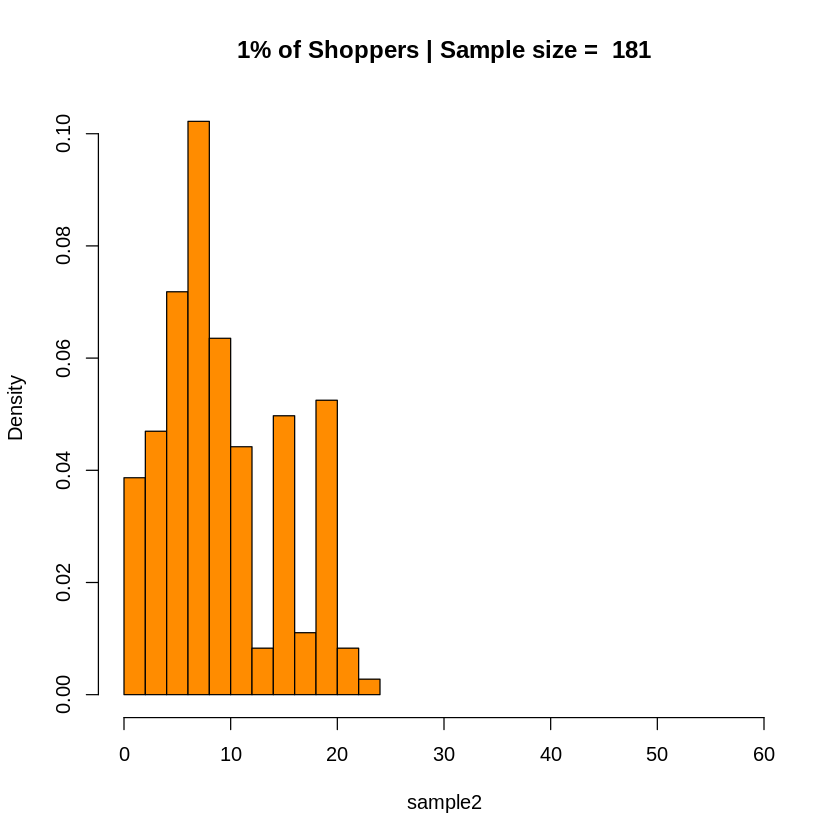

In [11]:
# SAMPLE 2
print("Taking 1% of total sample")
sample.size = round(purchase.samples.count*0.01)
cat("Sample size= ", sample.size)

sample2 = sample(purchase, size = sample.size, replace = TRUE)
sample2.mean = mean(sample2)
sample2.sd = sd(sample2)

cat("Orginal Data Mean | Sample Mean = ", purchase.mean, " | ",sample2.mean)
cat("Orginal Data Std. Dev. | Sample Std. Dev. = ", purchase.sd, " | ",sample2.sd)

main = paste("1% of Shoppers | Sample size = ",sample.size)
hist(sample2, prob = TRUE, breaks=15, xlim=c(0,60),col="darkorange", main = main)

[1] "Taking 5% of total sample"
Sample size=  905Orginal Data Mean | Sample Mean =  9.275286  |  9.341436Orginal Data Std. Dev. | Sample Std. Dev. =  5.033707  |  4.879918

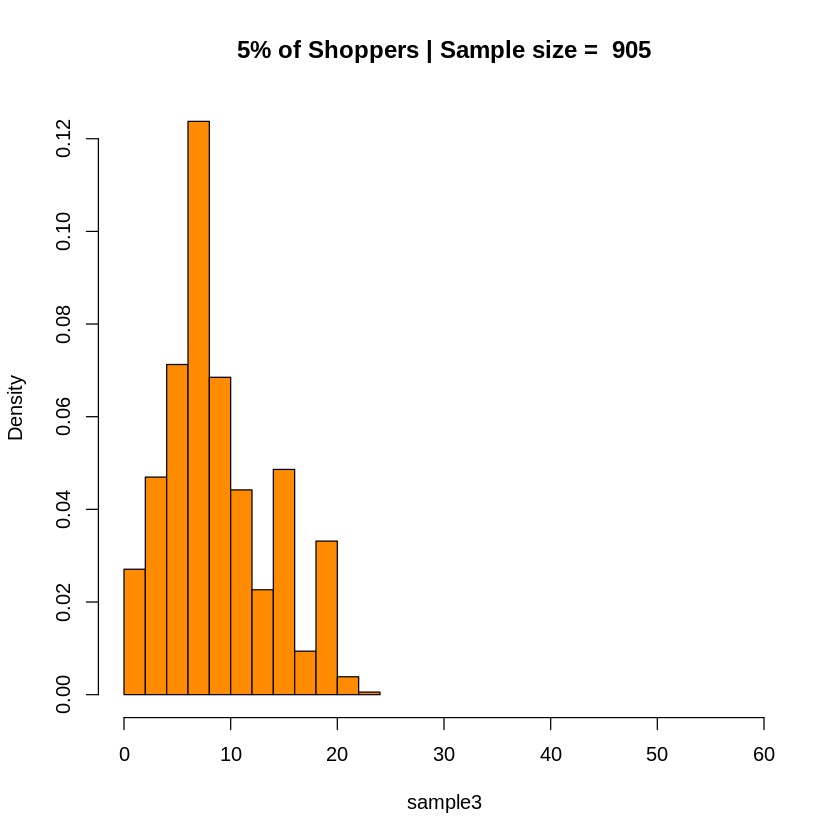

In [12]:
# SAMPLE 3
print("Taking 5% of total sample")
sample.size = round(purchase.samples.count*0.05)
cat("Sample size= ", sample.size)

sample3 = sample(purchase, size = sample.size, replace = TRUE)
sample3.mean = mean(sample3)
sample3.sd = sd(sample3)

cat("Orginal Data Mean | Sample Mean = ", purchase.mean, " | ",sample3.mean)
cat("Orginal Data Std. Dev. | Sample Std. Dev. = ", purchase.sd, " | ",sample3.sd)

main = paste("5% of Shoppers | Sample size = ",sample.size)
hist(sample3, prob = TRUE, breaks=15, xlim=c(0,60),col="darkorange", main = main)

[1] "Taking 30% of total sample"
Sample size=  5432Orginal Data Mean | Sample Mean =  9.275286  |  9.240795Orginal Data Std. Dev. | Sample Std. Dev. =  5.033707  |  5.111769

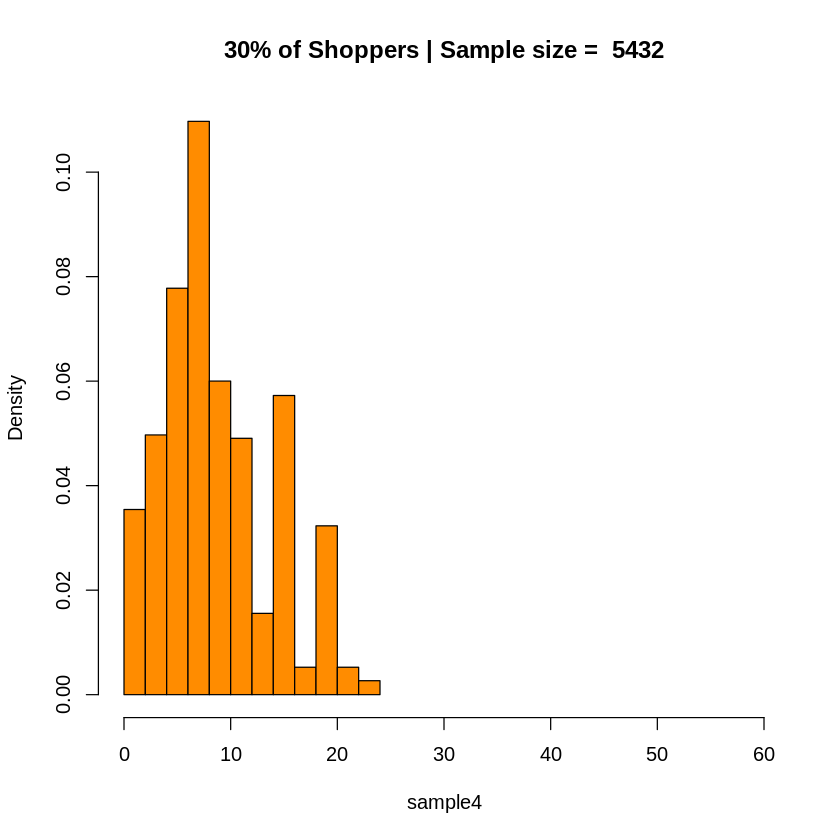

In [13]:
# SAMPLE 4
print("Taking 30% of total sample")
sample.size = round(purchase.samples.count*0.3)
cat("Sample size= ", sample.size)

sample4 = sample(purchase, size = sample.size, replace = TRUE)
sample4.mean = mean(sample4)
sample4.sd = sd(sample4)

cat("Orginal Data Mean | Sample Mean = ", purchase.mean, " | ",sample4.mean)
cat("Orginal Data Std. Dev. | Sample Std. Dev. = ", purchase.sd, " | ",sample4.sd)

main = paste("30% of Shoppers | Sample size = ",sample.size)
hist(sample4, prob = TRUE, breaks=15, xlim=c(0,60),col="darkorange", main = main)

[1] "Taking 75% of total sample"
Sample size=  13579Orginal Data Mean | Sample Mean =  9.275286  |  9.291038Orginal Data Std. Dev. | Sample Std. Dev. =  5.033707  |  5.110257

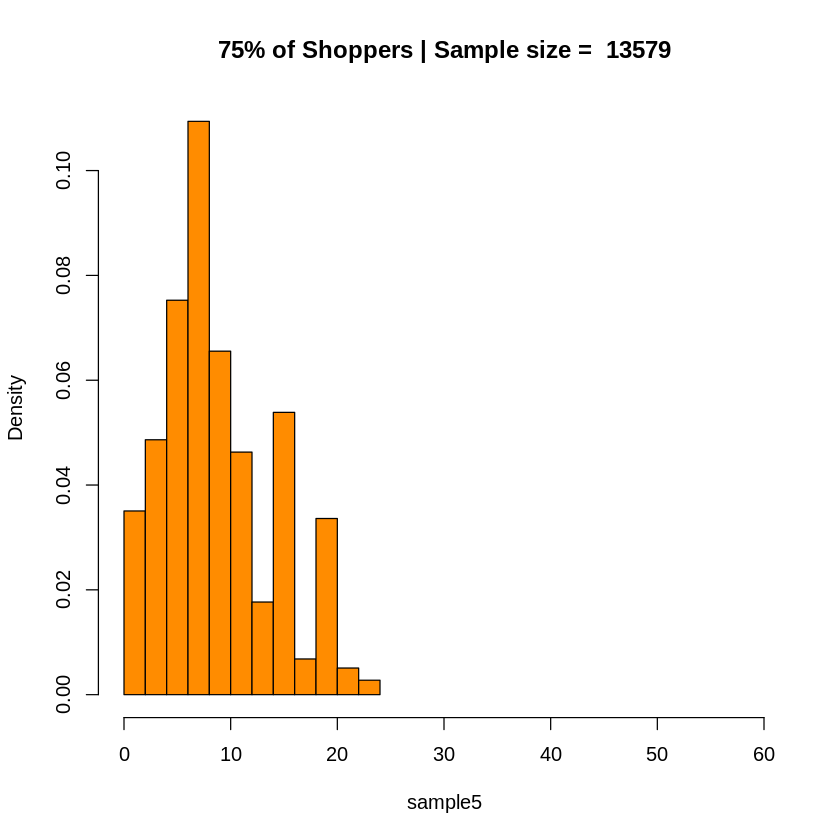

In [14]:
# SAMPLE 5
print("Taking 75% of total sample")
sample.size = round(purchase.samples.count*0.75)
cat("Sample size= ", sample.size)

sample5 = sample(purchase, size = sample.size, replace = TRUE)
sample5.mean = mean(sample5)
sample5.sd = sd(sample5)

cat("Orginal Data Mean | Sample Mean = ", purchase.mean, " | ",sample5.mean)
cat("Orginal Data Std. Dev. | Sample Std. Dev. = ", purchase.sd, " | ",sample5.sd)

main = paste("75% of Shoppers | Sample size = ",sample.size)
hist(sample5, prob = TRUE, breaks=15, xlim=c(0,60),col="darkorange", main = main)

In [15]:
print("In all plots we saw the distribution is centered around original mean")

options(digits = 3)
print("Mean: Original, 0.5%, 1%, 5%, 30%, 75% of total no of purchases")
cat(purchase.mean, sample1.mean, sample2.mean, sample3.mean, sample4.mean, sample5.mean)

print("Std. Dev.: Original, 0.5%, 1%, 5%, 30%, 75% of total no of purchases")
cat(purchase.sd, sample1.sd, sample2.sd, sample3.sd, sample4.sd, sample5.sd)

print("Therefore we can see that")
print("If data is drawn from any distribution, then the distribution of the sample means has
the shape of a normal distribution for a large sample. The mean of the sample mean distribution is equal to the
      mean of the parent data. The higher the sample size, the narrower the spread of the sample means.")


[1] "In all plots we saw the distribution is centered around original mean"
[1] "Mean: Original, 0.5%, 1%, 5%, 30%, 75% of total no of purchases"
9.28 8.26 9.73 9.34 9.24 9.29[1] "Std. Dev.: Original, 0.5%, 1%, 5%, 30%, 75% of total no of purchases"
5.03 4.56 5.54 4.88 5.11 5.11[1] "Therefore we can see that"
[1] "If data is drawn from any distribution, then the distribution of the sample means has\nthe shape of a normal distribution for a large sample. The mean of the sample mean distribution is equal to the\n      mean of the parent data. The higher the sample size, the narrower the spread of the sample means."


Show how various sampling methods can be used on your data. What are your conclusions if these samples are used instead of the whole dataset.

## SAMPLING : Stay in Current City
with replacement

In [16]:
# still using rescaled Purchase values
sample.size = round(0.07 * purchase.samples.count)#picking random sample size
cat("Sample size = ", sample.size)

# SIMPLE RANDOM SAMPLING
print("SIMPLE RANDOM SAMPLING")

#with replacement
print("With Replacement")
s = srswr(sample.size, nrow(blackfridaysales))
rows = (1:nrow(blackfridaysales))[s!=0]
rows = rep(rows,s[s!=0])
sample.with.replace = blackfridaysales[rows,]
print("For Example")
print("Years in Current City Original: ")
table(blackfridaysales$years.in.current.city)
print("Years in Current City Sampled Data")
table(sample.with.replace$years.in.current.city)


Sample size =  1267[1] "SIMPLE RANDOM SAMPLING"
[1] "With Replacement"
[1] "For Example"
[1] "Years in Current City Original: "



     0      1      2      3      6 
 74398 193821 101838  95285  84726 

[1] "Years in Current City Sampled Data"



  0   1   2   3   6 
144 473 238 220 192 

In [17]:
# Using Sample Data vs Original Data
print("Sample Data")
print("Gender Count")
table(sample.with.replace$gender)
print("Percentage wise Gender Distribution")
prop.table(table(sample.with.replace$gender))*100

print("Original Data")
print("Percentage wise Gender Distribution")
prop.table(table(blackfridaysales$gender))*100

print("RESULT : As we can see that distribution has changed in sample data but not much deflection wrt original")


[1] "Sample Data"
[1] "Gender Count"



  F   M 
334 933 

[1] "Percentage wise Gender Distribution"



   F    M 
26.4 73.6 

[1] "Original Data"
[1] "Percentage wise Gender Distribution"



   F    M 
24.7 75.3 

[1] "RESULT : As we can see that distribution has changed in sample data but not much deflection wrt original"


without replacement

In [18]:
# without replacement
print("Without Replacement")
s = srswor(sample.size, nrow(blackfridaysales))
rows = (1:nrow(blackfridaysales))[s!=0]
rows = rep(rows,s[s!=0])
sample.without.replace = blackfridaysales[rows,]
print("For Example")
print("Years in Current City Original: ")
table(blackfridaysales$years.in.current.city)
print("Years in Current City Sampled Data")
table(sample.without.replace$years.in.current.city)

[1] "Without Replacement"
[1] "For Example"
[1] "Years in Current City Original: "



     0      1      2      3      6 
 74398 193821 101838  95285  84726 

[1] "Years in Current City Sampled Data"



  0   1   2   3   6 
153 453 230 226 205 

In [19]:
# Using Sample Data vs Original Data
print("Sample Data")
print("Gender Count")
table(sample.without.replace$gender)
print("Percentage wise Gender Distribution")
prop.table(table(sample.without.replace$gender))*100

print("Original Data")
print("Percentage wise Gender Distribution")
prop.table(table(blackfridaysales$gender))*100

print("RESULT : As we can see that distribution has changed in sample data but not much deflection wrt to original")


[1] "Sample Data"
[1] "Gender Count"



  F   M 
326 941 

[1] "Percentage wise Gender Distribution"



   F    M 
25.7 74.3 

[1] "Original Data"
[1] "Percentage wise Gender Distribution"



   F    M 
24.7 75.3 

[1] "RESULT : As we can see that distribution has changed in sample data but not much deflection wrt to original"


## SYSTEMATIC SAMPLING

In [20]:
# SYSTEMATIC SAMPLING
print("SYSTEMATIC SAMPLING")

# Equal Probability
print("Considering equal probabilities of every data")

N = nrow(blackfridaysales)
n = sample.size
k = ceiling(N/n)
r = sample(k,1)
s = seq(r, by=k, length=n)
sample.systematic = blackfridaysales[s,]
print("For Example")
print("Years in Current City Original: ")
table(blackfridaysales$years.in.current.city)
print("Years in Current City Sampled Data")
table(sample.systematic$years.in.current.city)


[1] "SYSTEMATIC SAMPLING"
[1] "Considering equal probabilities of every data"
[1] "For Example"
[1] "Years in Current City Original: "



     0      1      2      3      6 
 74398 193821 101838  95285  84726 

[1] "Years in Current City Sampled Data"



  0   1   2   3   6 
167 441 259 194 204 

In [21]:
# Using Sample Data vs Original Data
print("Sample Data")
print("Gender Count")
table(sample.systematic$gender)
print("Percentage wise Gender Distribution")
prop.table(table(sample.systematic$gender))*100

print("Original Data")
print("Percentage wise Gender Distribution")
prop.table(table(blackfridaysales$gender))*100

print("RESULT : As we can see that distribution has changed in sample data with notable percentages")
print("Sample results vary a lot wrt to original data")

[1] "Sample Data"
[1] "Gender Count"



  F   M 
314 951 

[1] "Percentage wise Gender Distribution"



   F    M 
24.8 75.2 

[1] "Original Data"
[1] "Percentage wise Gender Distribution"



   F    M 
24.7 75.3 

[1] "RESULT : As we can see that distribution has changed in sample data with notable percentages"
[1] "Sample results vary a lot wrt to original data"


## UNEQUAL PROBABILITIES

In [22]:
print("Considering unequal probabilities for data")

pik = inclusionprobabilities(blackfridaysales$years.in.current.city , sample.size)
s= UPsystematic(pik)
sample.systematic.unequal.prob = blackfridaysales[s!=0,]
print("For Example")
print("Years in Current City Original: ")
table(blackfridaysales$years.in.current.city)
print("Years in Current City Sampled Data")
table(sample.systematic.unequal.prob$years.in.current.city)

[1] "Considering unequal probabilities for data"


Warning message in inclusionprobabilities(blackfridaysales$years.in.current.city, :
“there are zero values in the initial vector a
”


[1] "For Example"
[1] "Years in Current City Original: "



     0      1      2      3      6 
 74398 193821 101838  95285  84726 

[1] "Years in Current City Sampled Data"



  1   2   3   6 
212 216 305 534 

In [23]:
 # Using Sample Data vs Original Data
print("Sample Data")
print("Gender Count")
table(sample.systematic.unequal.prob$gender)
print("Percentage wise Gender Distribution")
prop.table(table(sample.systematic.unequal.prob$gender))*100

print("Original Data")
print("Percentage wise Gender Distribution")
prop.table(table(blackfridaysales$gender))*100

print("RESULT : As we can see that distribution has changed in sample data but not much deflection wrt original")

[1] "Sample Data"
[1] "Gender Count"



  F   M 
288 979 

[1] "Percentage wise Gender Distribution"



   F    M 
22.7 77.3 

[1] "Original Data"
[1] "Percentage wise Gender Distribution"



   F    M 
24.7 75.3 

[1] "RESULT : As we can see that distribution has changed in sample data but not much deflection wrt original"


## STRATIFIED SAMPLING

In [24]:
# STRATIFIED SAMPLING

temporary = blackfridaysales
temporary.size = sample.size

print("STRATIFIED SAMPLING")

sample.size = 10 #changin the sample size for this sampling to better understand
cat("Sample size for startified sampling = ",sample.size)

# ordering the data
blackfridaysales = blackfridaysales[order(blackfridaysales$years.in.current.city),]

freq <- table(blackfridaysales$years.in.current.city)
size <- sample.size * freq / sum(freq)

st1 = strata(blackfridaysales, size = size , stratanames = c("years.in.current.city"), method = "srswr", description = TRUE)
sample = getdata(blackfridaysales,st1)
sample

[1] "STRATIFIED SAMPLING"
Sample size for startified sampling =  10Stratum 1 

Population total and number of selected units: 74398 1.35 
Stratum 2 

Population total and number of selected units: 193821 3.52 
Stratum 3 

Population total and number of selected units: 101838 1.85 
Stratum 4 

Population total and number of selected units: 95285 1.73 
Stratum 5 

Population total and number of selected units: 84726 1.54 
Number of strata  5 
Total number of selected units 10 


,user.id,product.id,gender,occupation,city,marital.status,product.category.1,product.category.2,product.category.3,purchase,years.in.current.city,ID_unit,Prob,Stratum
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>
316089,1000736,P00307342,M,12,C,1,8,0,0,7767,0,42929,1.82e-05,1
168861,1002030,P00005042,M,4,B,0,6,16,0,20197,1,133580,1.82e-05,2
255678,1003471,P00058442,M,4,A,0,5,14,0,5372,1,164348,1.82e-05,2
396457,1001055,P00086142,M,0,A,1,5,0,0,7037,1,213813,1.82e-05,2
112969,1005443,P00041342,M,12,B,0,11,15,16,7589,2,289180,1.82e-05,3
117179,1000058,P0099342,M,2,B,0,5,8,0,6969,3,390291,1.82e-05,4
41439,1000383,P00110542,F,7,A,1,8,0,0,7881,6,471771,1.82e-05,5


In [25]:
# Using Sample Data vs Original Data
print("Sample Data")
print("Gender Count")
table(sample$gender)
print("Percentage wise Gender Distribution")
prop.table(table(sample$gender))*100

print("Original Data")
print("Percentage wise Gender Distribution")
prop.table(table(blackfridaysales$gender))*100

print("RESULT : As we can see that distribution has changed by large percentages")
print("With this distribution we may have much different results")

print("Taking another example of Average Purchase")
print("Sample Data")
mean(sample$purchase)

print("Original Data")
print("Percentage wise Gender Distribution")
mean(blackfridaysales$purchase)

print("RESULT : Mean is differing in 1000s using this sample")
print("Thus much different interpretation if used this sample data")

[1] "Sample Data"
[1] "Gender Count"



F M 
1 6 

[1] "Percentage wise Gender Distribution"



   F    M 
14.3 85.7 

[1] "Original Data"
[1] "Percentage wise Gender Distribution"



   F    M 
24.7 75.3 

[1] "RESULT : As we can see that distribution has changed by large percentages"
[1] "With this distribution we may have much different results"
[1] "Taking another example of Average Purchase"
[1] "Sample Data"


[1] 8973

[1] "Original Data"
[1] "Percentage wise Gender Distribution"


[1] 9264

[1] "RESULT : Mean is differing in 1000s using this sample"
[1] "Thus much different interpretation if used this sample data"


In [26]:
# revert the data back to orginal
blackfridaysales = temporary
sample.size = temporary.size

## CLUSTER SAMPLING

In [27]:
temporary.size = sample.size
sample.size = 2 # should be less than no of unique value of the column which is basis of sampling

print("CLUSTER SAMPLING")
cl = cluster(blackfridaysales, c("years.in.current.city"), size=sample.size, method="srswor")
cl.sample = getdata(blackfridaysales, cl)
cat("Cluster Sampling for Years in Current City with sample size= ",sample.size)
table(cl.sample$years.in.current.city)


# Using Sample Data vs Original Data
print("Sample Data")
print("Gender Count")
table(cl.sample$gender)
print("Percentage wise Gender Distribution")
prop.table(table(cl.sample$gender))*100

print("Original Data")
print("Percentage wise Gender Distribution")
prop.table(table(blackfridaysales$gender))*100

print("RESULT : As we can see that distribution has changed in sample data but not much deflection")


[1] "CLUSTER SAMPLING"
Cluster Sampling for Years in Current City with sample size=  2


    0     6 
74398 84726 

[1] "Sample Data"
[1] "Gender Count"



     F      M 
 35659 123465 

[1] "Percentage wise Gender Distribution"



   F    M 
22.4 77.6 

[1] "Original Data"
[1] "Percentage wise Gender Distribution"



   F    M 
24.7 75.3 

[1] "RESULT : As we can see that distribution has changed in sample data but not much deflection"


In [28]:
# revert the data back to original
sample.size = temporary.size

print("RESULT: Thus of all sampling in this data SYSTEMATIC SAMPLING WITH EQUAL PROBABILITY & STRATIFIED SAMPLING samples get deflected most as compared to original data")
print("Rest of the sampling data interpretations remains similar to the original data")


[1] "RESULT: Thus of all sampling in this data SYSTEMATIC SAMPLING WITH EQUAL PROBABILITY & STRATIFIED SAMPLING samples get deflected most as compared to original data"
[1] "Rest of the sampling data interpretations remains similar to the original data"


## TIBBLE

In [29]:
print("Creating tibble of data")
bfs = as.tibble(blackfridaysales)
bfs

# Observation

print("Average year a shopper stayed in the current city")
print("For A")
dplyr::filter(bfs, city=="A") %>% summarise(mean(years.in.current.city))
print("For B")
dplyr::filter(bfs, city=="B") %>% summarise(mean(years.in.current.city))
print("For C")
dplyr::filter(bfs, city=="C") %>% summarise(mean(years.in.current.city))

# Observation

print("Average Purchase made in each City Category on the basis of Stay in the Current City")
print("For A")
dplyr::filter(bfs, city=="A") %>% group_by(years.in.current.city) %>% summarise(mean(purchase))
print("For B")
dplyr::filter(bfs, city=="B") %>% group_by(years.in.current.city) %>% summarise(mean(purchase))
print("For C")
dplyr::filter(bfs, city=="C") %>% group_by(years.in.current.city) %>% summarise(mean(purchase))


# CONCLUSIONS

print("We analyzed following points and could use them to increase our sales in next black friday")
print("Number of Male Shoppers > Female Shoppers")
print("Products in Product Category 2 sold most")
print("People generally spent over $5000 in sales")
print("People in age range 26-35 purchase most")
print("There are highest average sales in City Category 'C' as compared to other")
print("Unequal Probability sampling technique could be used over this dataset for best results")

[1] "Creating tibble of data"


Warning message:
“`as.tibble()` was deprecated in tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


user.id,product.id,gender,occupation,city,years.in.current.city,marital.status,product.category.1,product.category.2,product.category.3,purchase
<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>
1000001,P00069042,F,10,A,2,0,3,0,0,8370
1000001,P00248942,F,10,A,2,0,1,6,14,15200
1000001,P00087842,F,10,A,2,0,12,0,0,1422
1000001,P00085442,F,10,A,2,0,12,14,0,1057
1000002,P00285442,M,16,C,6,0,8,0,0,7969
1000003,P00193542,M,15,A,3,0,1,2,0,15227
1000004,P00184942,M,7,B,2,1,1,8,17,19215
1000004,P00346142,M,7,B,2,1,1,15,0,15854
1000004,P0097242,M,7,B,2,1,1,16,0,15686


[1] "Average year a shopper stayed in the current city"
[1] "For A"


mean(years.in.current.city)
<dbl>
2.11


[1] "For B"


mean(years.in.current.city)
<dbl>
2.17


[1] "For C"


mean(years.in.current.city)
<dbl>
2.2


[1] "Average Purchase made in each City Category on the basis of Stay in the Current City"
[1] "For A"


years.in.current.city,mean(purchase)
<dbl>,<dbl>
0,8987
1,8879
2,8970
3,8915
6,8830


[1] "For B"


years.in.current.city,mean(purchase)
<dbl>,<dbl>
0,8903
1,9179
2,9193
3,9190
6,9193


[1] "For C"


years.in.current.city,mean(purchase)
<dbl>,<dbl>
0,9767
1,9647
2,9770
3,9768
6,9737


[1] "We analyzed following points and could use them to increase our sales in next black friday"
[1] "Number of Male Shoppers > Female Shoppers"
[1] "Products in Product Category 2 sold most"
[1] "People generally spent over $5000 in sales"
[1] "People in age range 26-35 purchase most"
[1] "There are highest average sales in City Category 'C' as compared to other"
[1] "Unequal Probability sampling technique could be used over this dataset for best results"
